In [37]:
import pandas as pd 
import json 
import matplotlib.pyplot as plt
import numpy as np

In [38]:
asset_names = [
    "ACWI.World.Equities", "AGGG.World.Debt", "AHYG.Asia.Debt", "BWX.World.Debt",
    "EDIV.EmergingMarkets.Equities", "EEM.EmergingMarkets.Equities", "EFA.World.Equities",
    "EFAS.World.Dividend.Equities", "EMB.EmergingMarkets.Debt", "EPP.Pacific_ex_Japan.Equities",
    "EWC.Canada.Equities", "EWG.Europe.Equities", "EWJ.Japan.Equities", "EWU.Europe.Equities",
    "EWZ.Brazil.Equities", "FXI.China.Equities", "GHYG.World.Debt", "GLD.World.Commodities",
    "GOVT.US.Debt", "HYG.US.Debt", "IHYG.Europe.Debt", "IGOV.World.Debt", "INDA.India.Equities",
    "IWM.US.Equities", "IEV.Europe.Equities", "IEF.US.Debt", "JNK.US.Debt", "LQD.US.Debt",
    "PSP.World.PrivateEquity", "REET.World.Alternative", "SAUS.Australia.Equities",
    "SDY.US.Dividend.Equities", "SPY.US.Equities", "TLT.US.Debt", "URTH.World.Equities",
    "VEU.World.Equities", "VTI.US.Equities", "VWOB.EmergingMarkets.Debt"
]

In [39]:
def process_weights(json_data):
    results = {}

    for timestamp, data in json_data.items():
    
        weights = data.get('optimal_weights', [])
        expected_return = data.get('expected_return', None)
        scr_risk = data.get('SCR_risk', None)
        risk_measure = data.get('risk_measure', None)

        weights = np.array(weights)

        normalized_weights = weights / np.sum(weights)

        weighted_return = np.sum(normalized_weights * expected_return)

        results[timestamp] = {
            'normalized_weights': normalized_weights.tolist(),
            'expected_return': expected_return,
            'scr_risk': scr_risk,
            'risk_measure': risk_measure,
            'weighted_return': weighted_return
        }

    return results


with open('../optimization_results.json', 'r') as f:
    json_data = json.load(f)

results = process_weights(json_data)

for timestamp, result in results.items():
    print(f"Timestamp: {timestamp}")
    print(f"Normalized Weights: {result['normalized_weights']}")
    print(f"Expected Return: {result['expected_return']}")
    print(f"SCR Risk: {result['scr_risk']}")
    print(f"Risk Measure: {result['risk_measure']}")
    print(f"Weighted Return: {result['weighted_return']}\n")

Timestamp: 2024-10-17T14:33:26.293489
Normalized Weights: [0.007055188440598271, 0.0533491946162017, 0.00866638192657144, 0.005395213582531215, 0.04431501076413581, 0.046283100178562, 0.05801764759610769, 0.04236940257196102, 0.009610773643272497, 0.013401416190943215, 0.025153216191146473, 0.04944985578259981, 0.012844102555184445, 0.0032578901693821557, 0.02704445367790711, 0.008179788274259548, 0.007931310218316534, 0.04898051013507758, 0.037417424530595794, 0.06061084586206476, 0.002006870498155778, 0.01001704677431269, 0.022563126983909405, 0.020123930516643025, 0.03650936583420466, 0.026071738050173435, 0.042881046697717154, 0.009271666657222585, 0.0043552717140043695, 0.02041176185731305, 0.05460586907134632, 0.02201637044577615, 0.013337939467733616, 0.03256332035574813, 0.004350314665330038, 0.028250086163101325, 0.04486565491079917, 0.03646589242908986]
Expected Return: -2.2157790876777078e-05
SCR Risk: 6.600666546807916e+64
Risk Measure: CVaR
Weighted Return: -2.215779087677

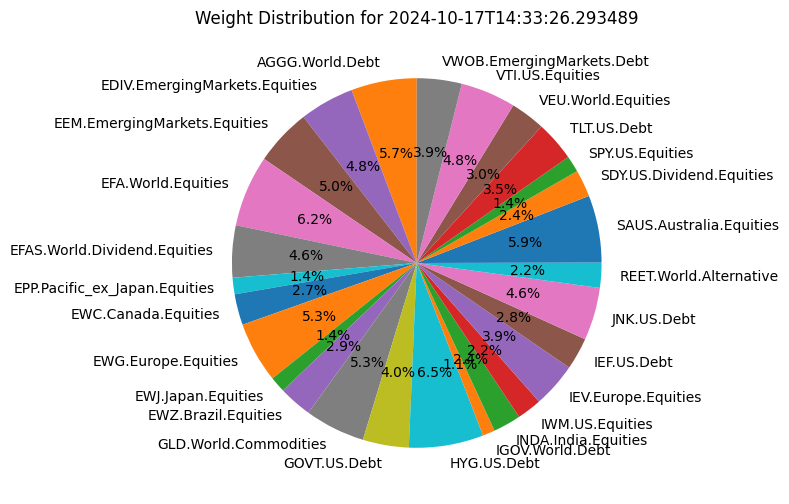

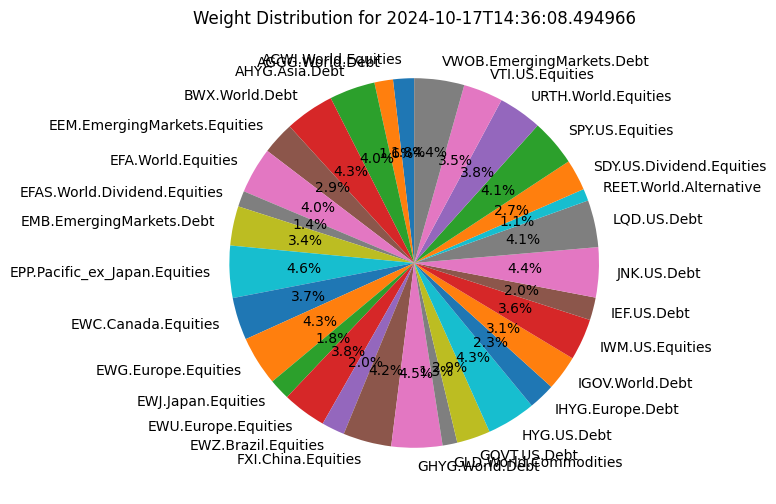

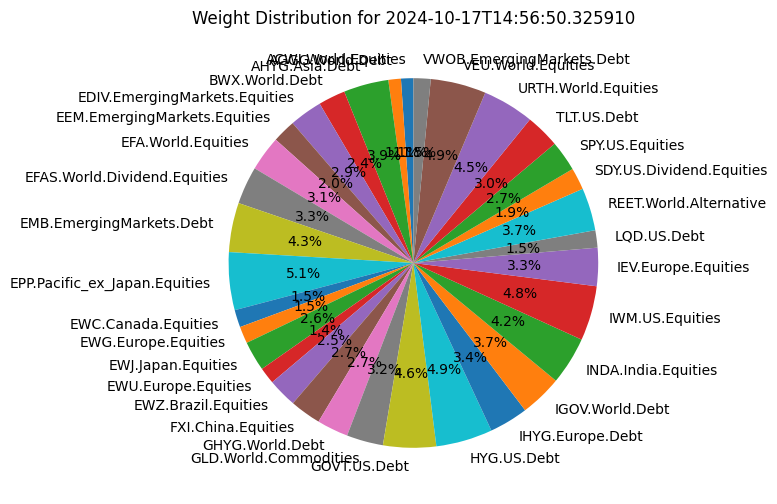

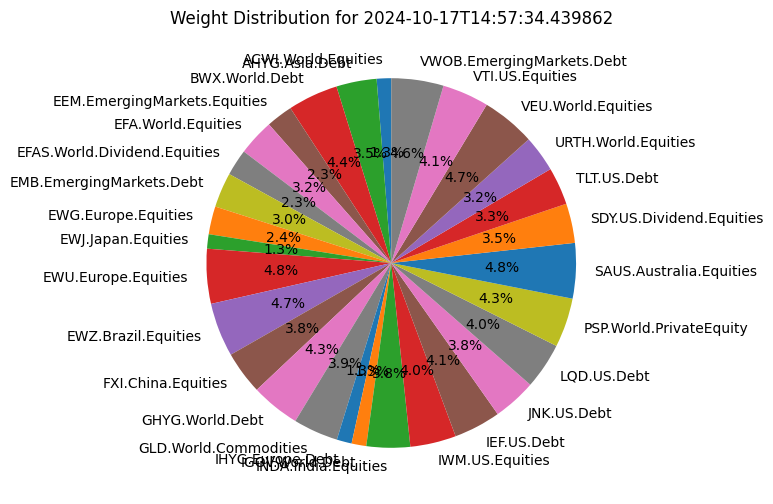

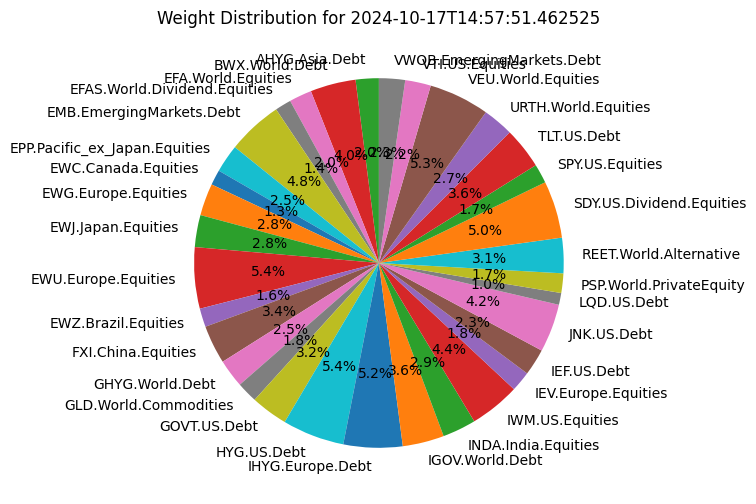

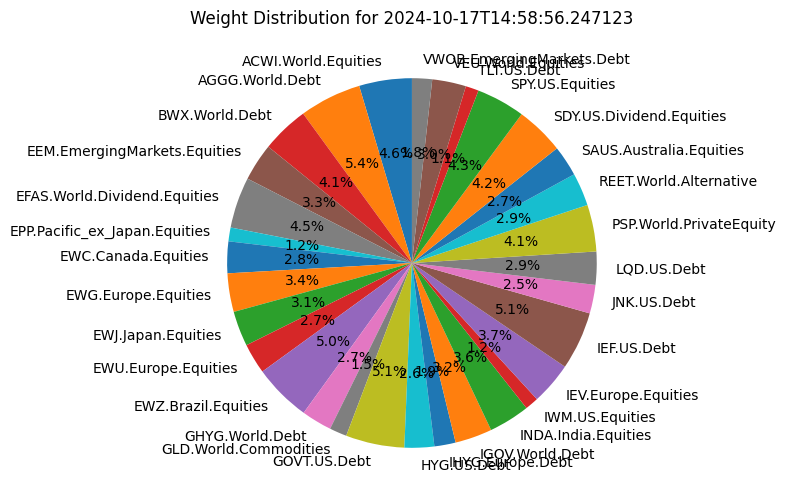

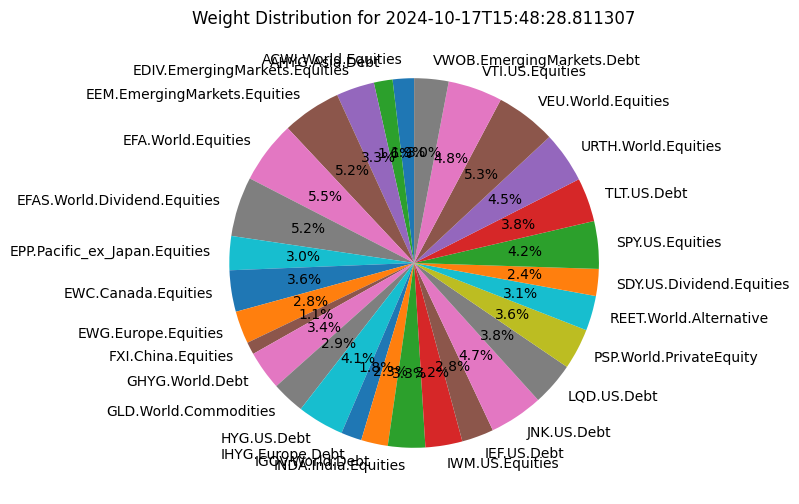

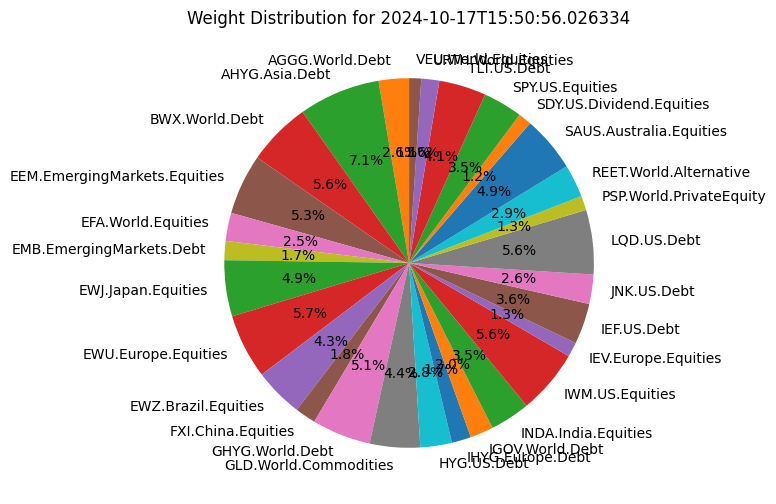

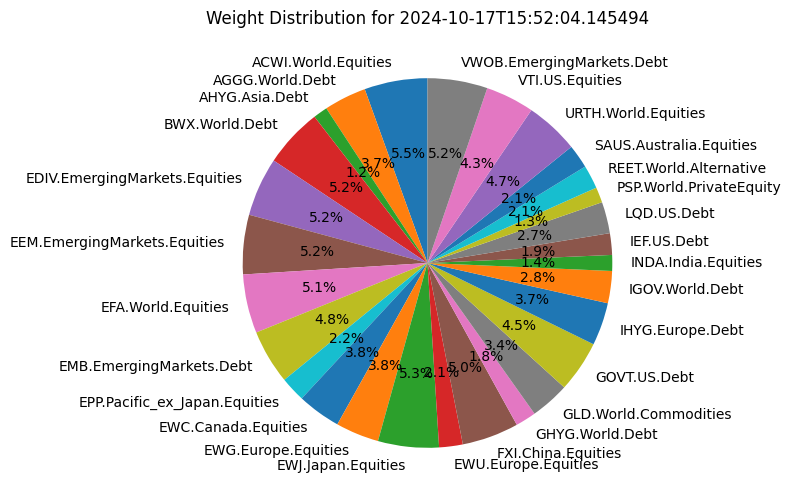

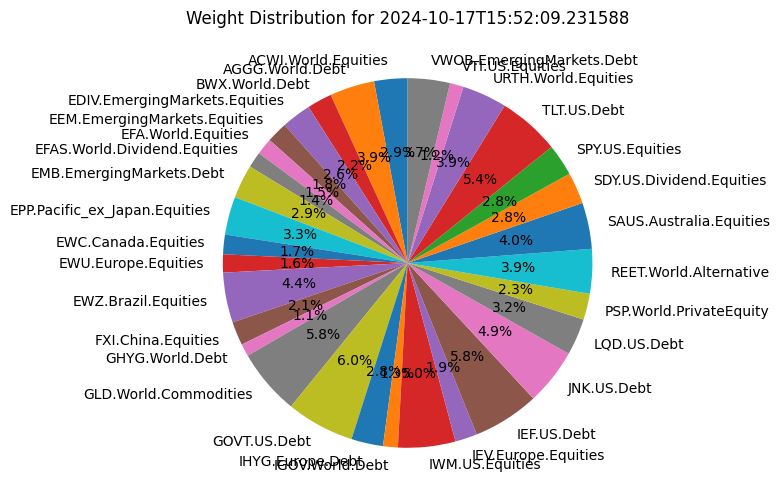

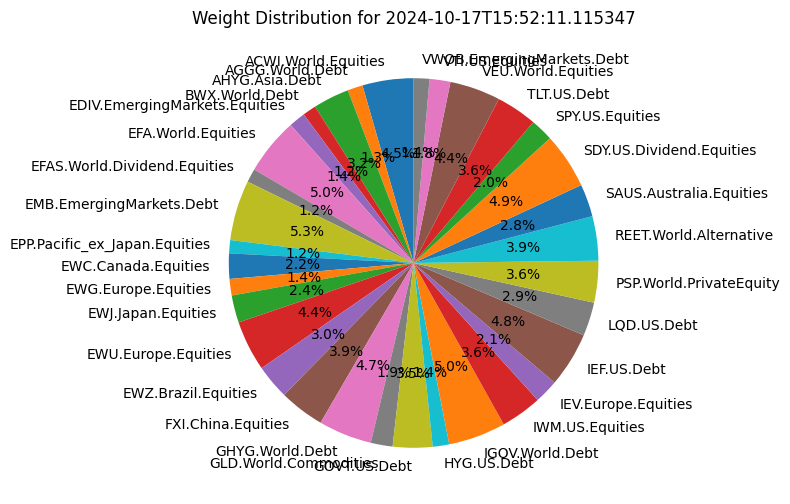

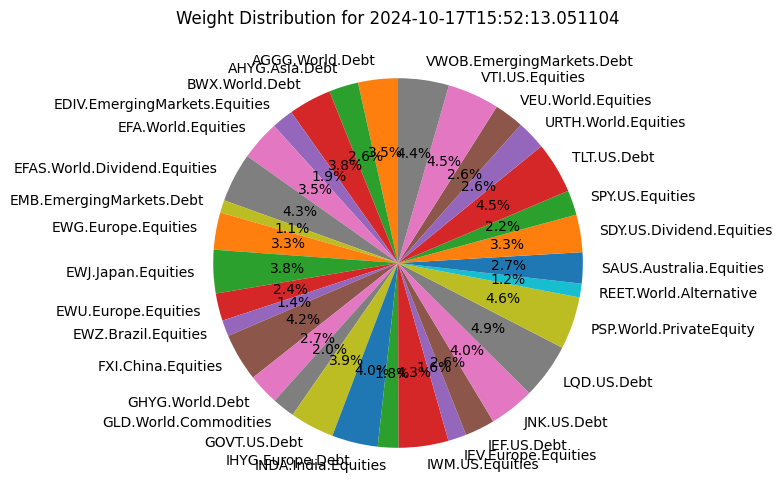

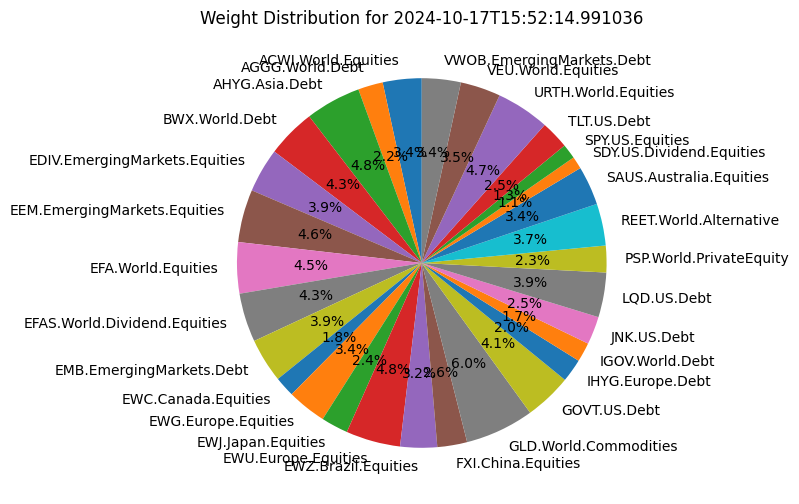

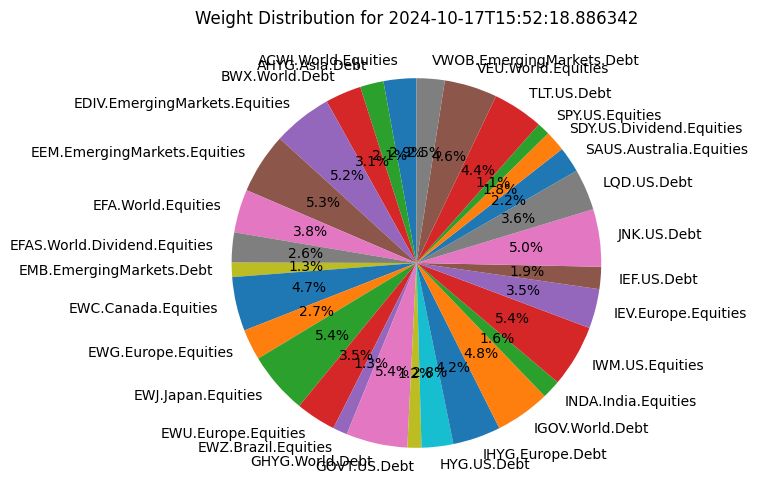

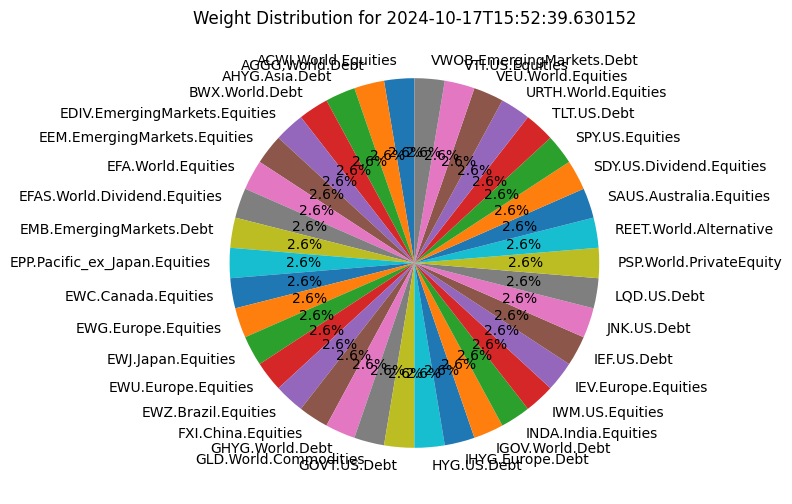

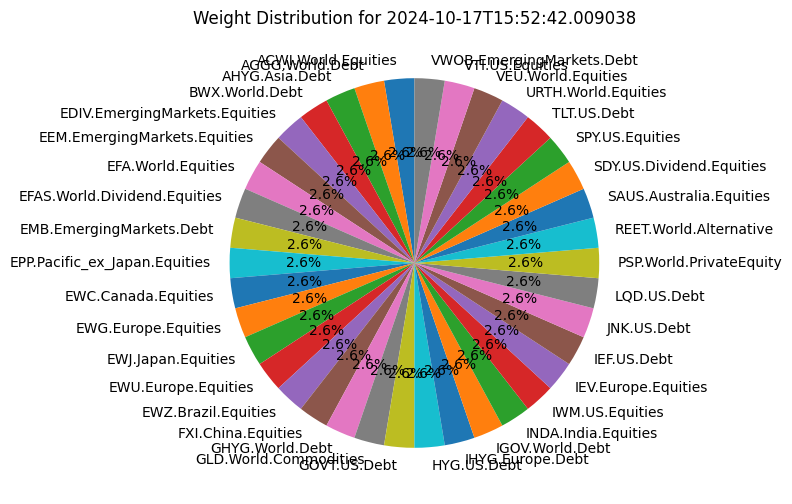

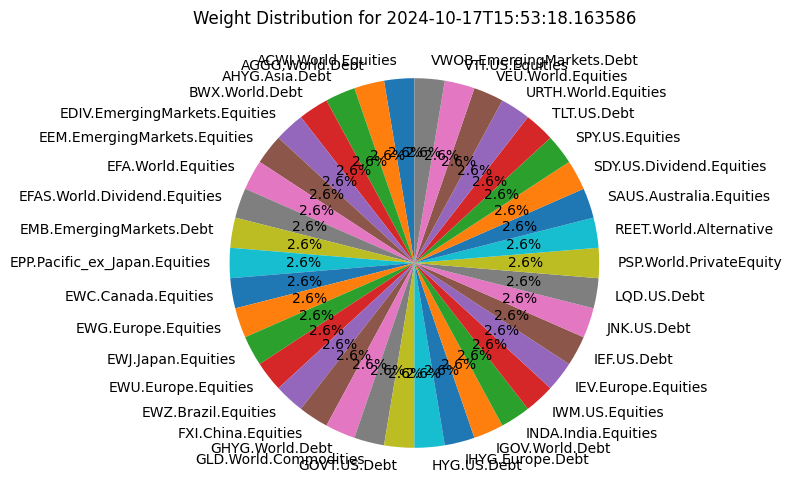

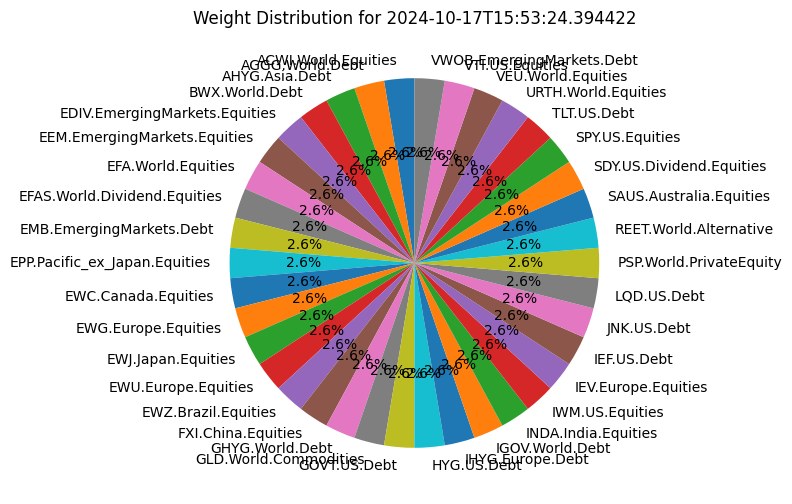

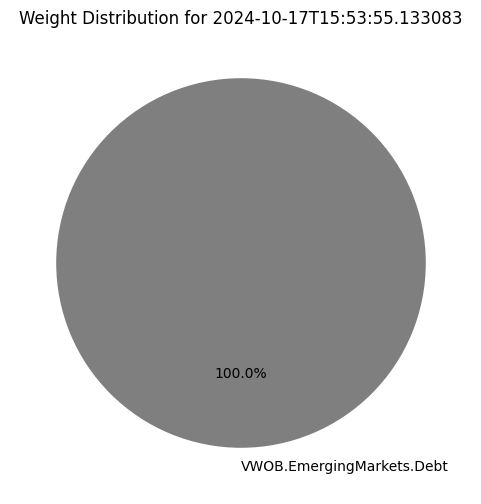

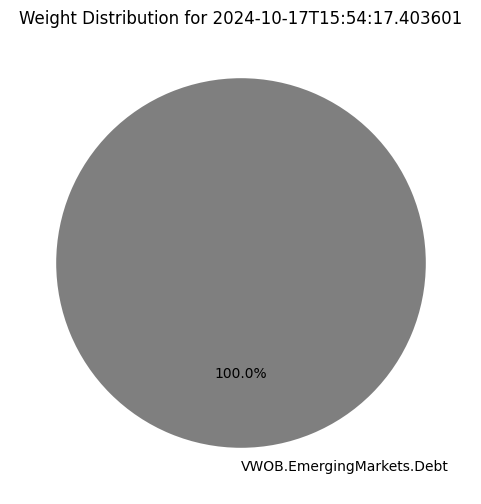

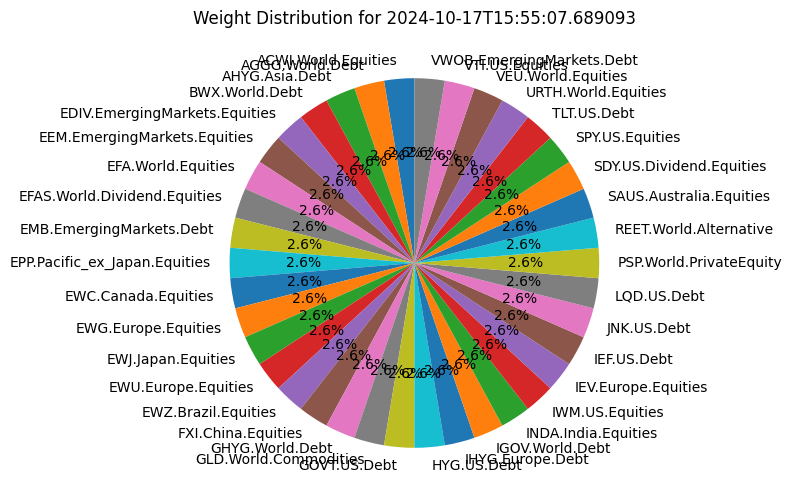

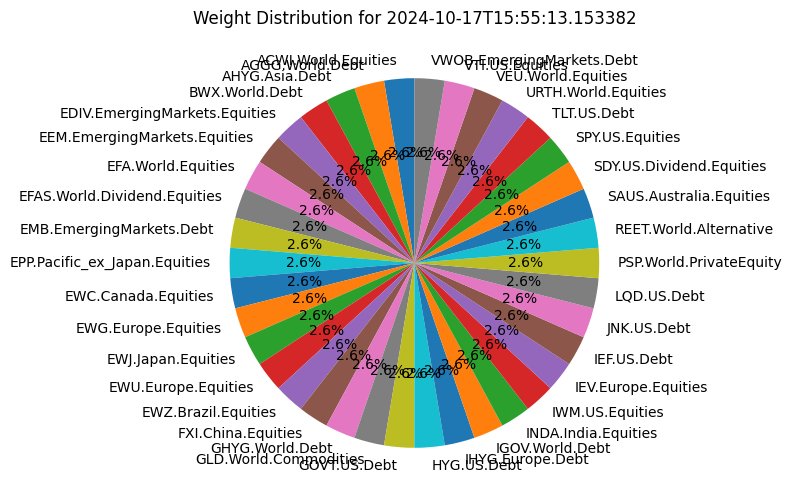

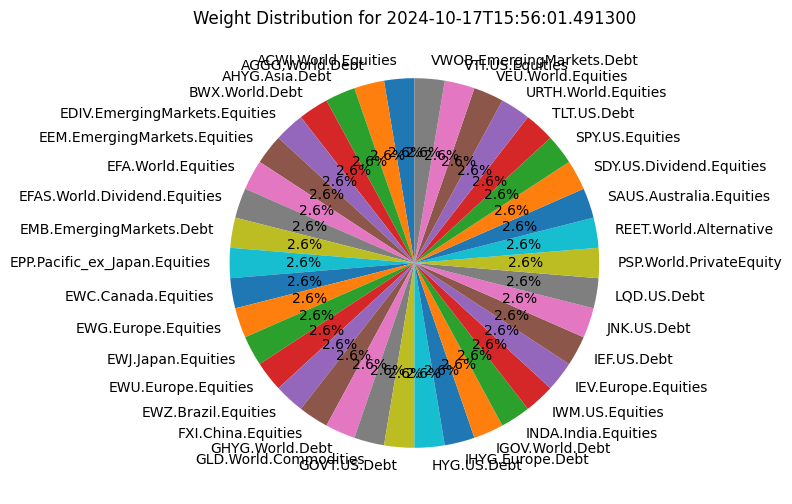

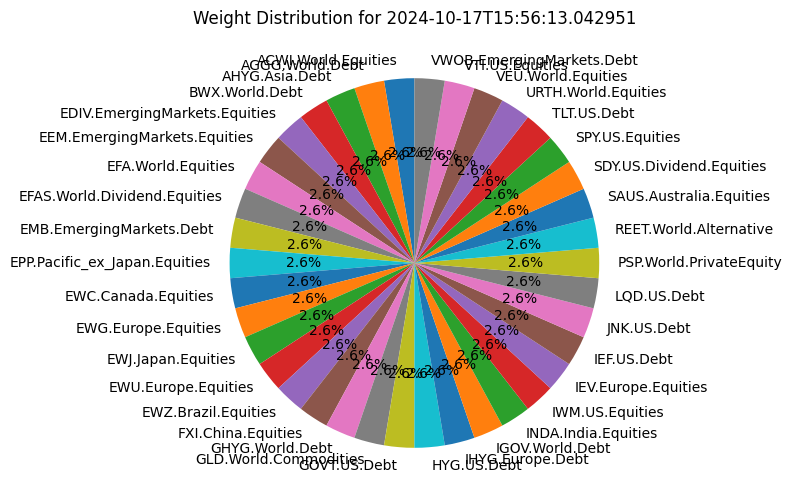

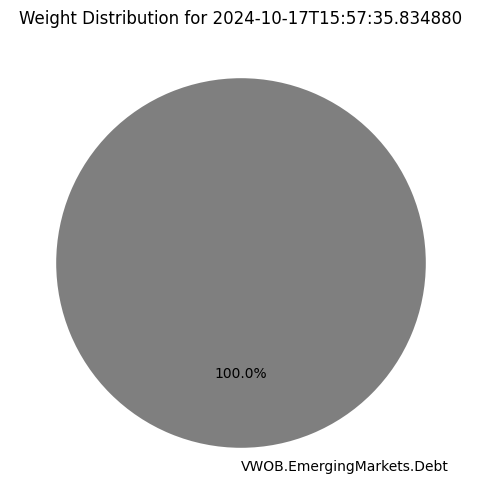

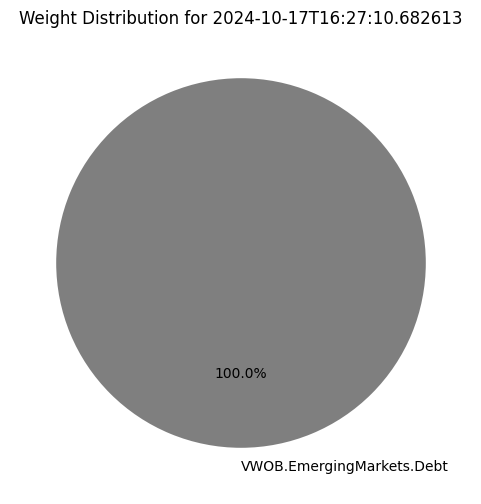

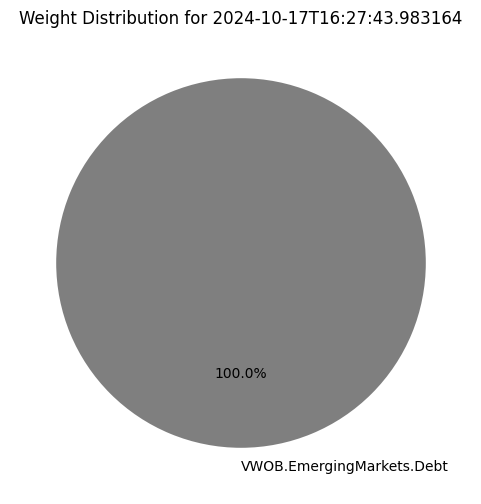

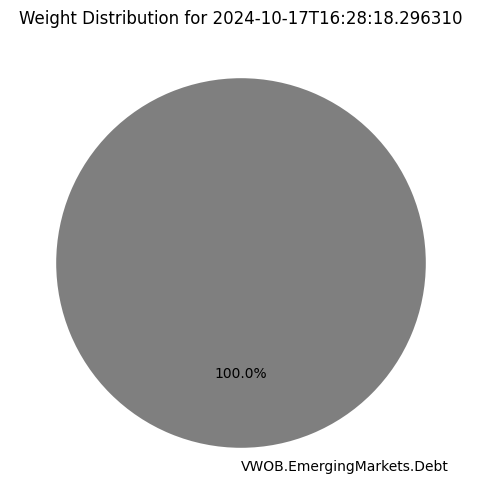

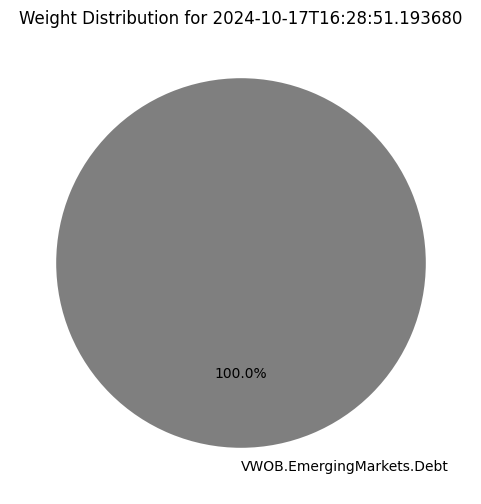

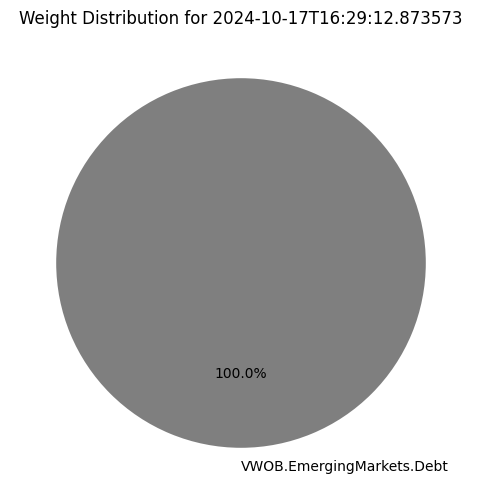

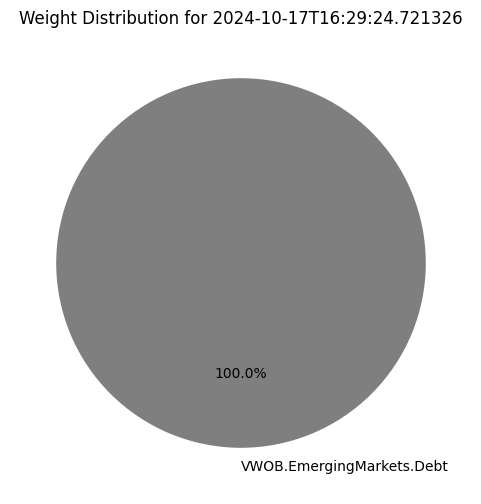

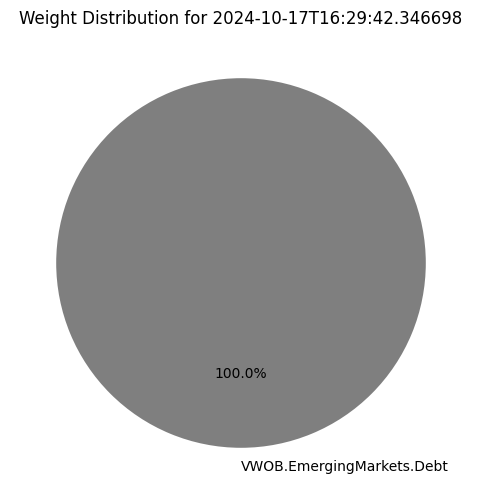

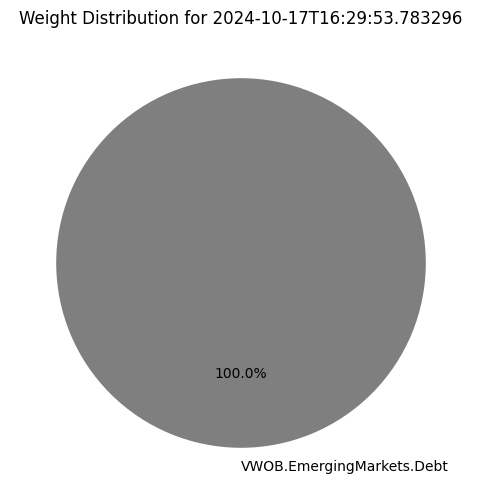

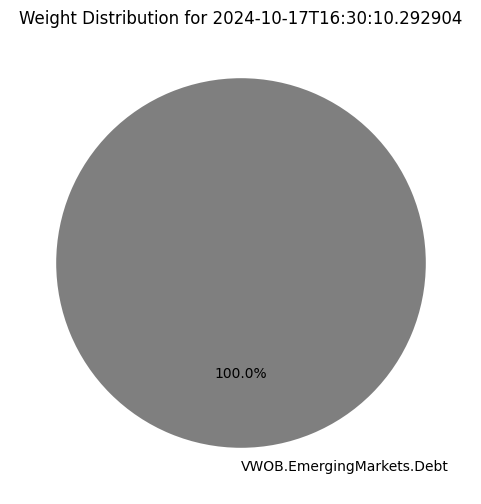

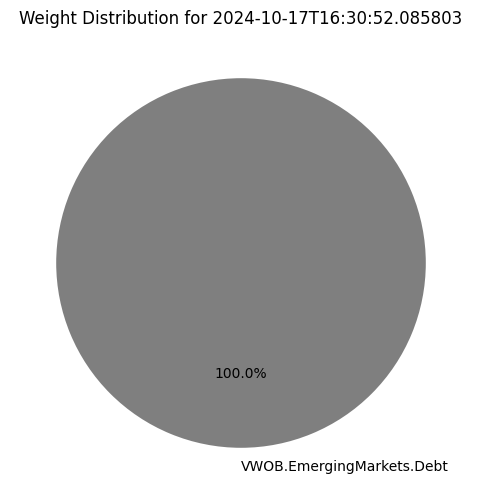

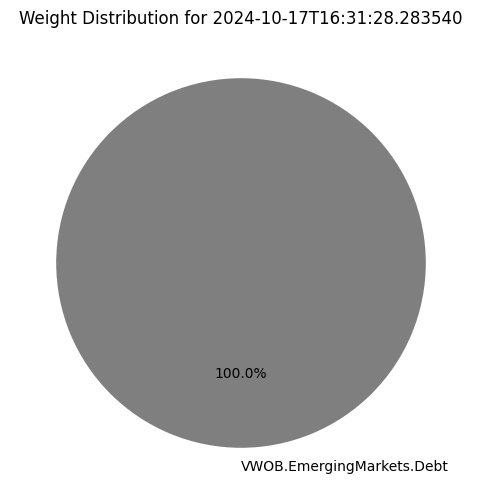

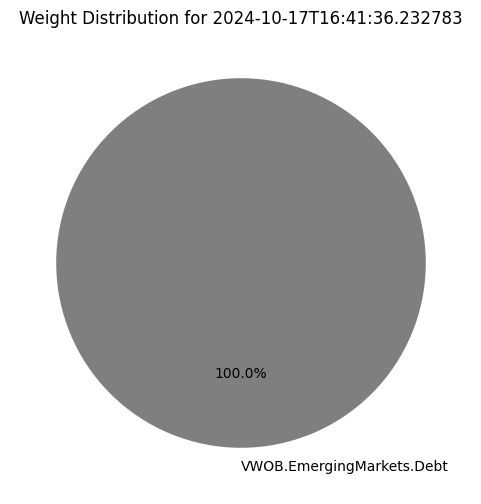

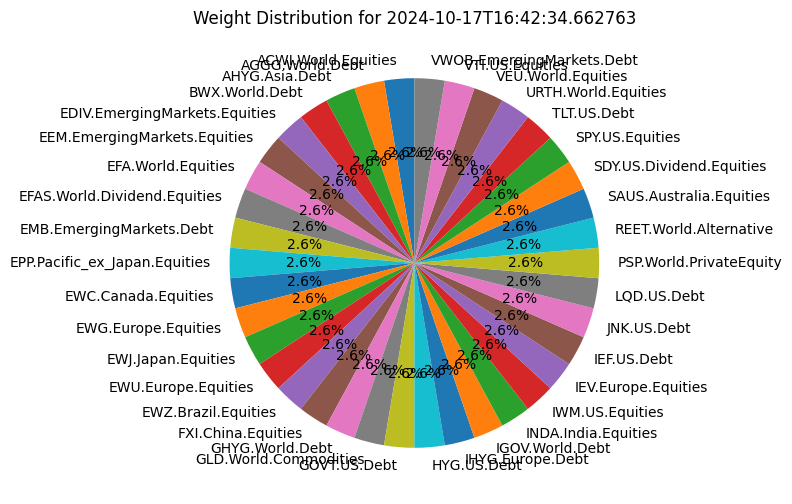

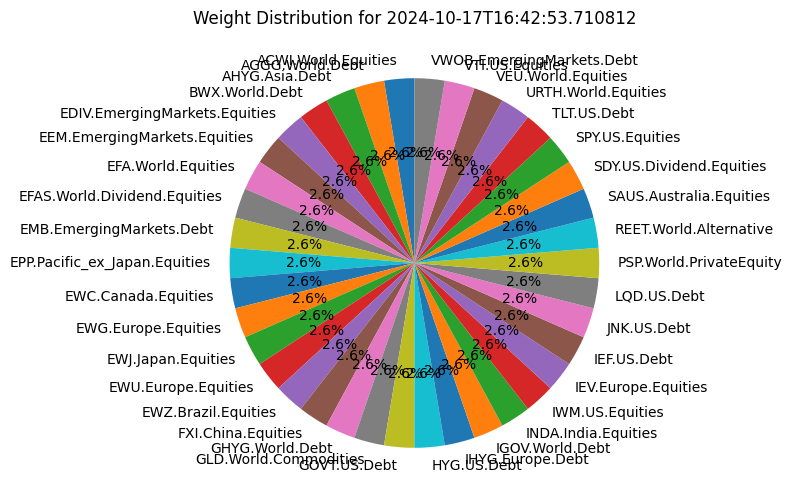

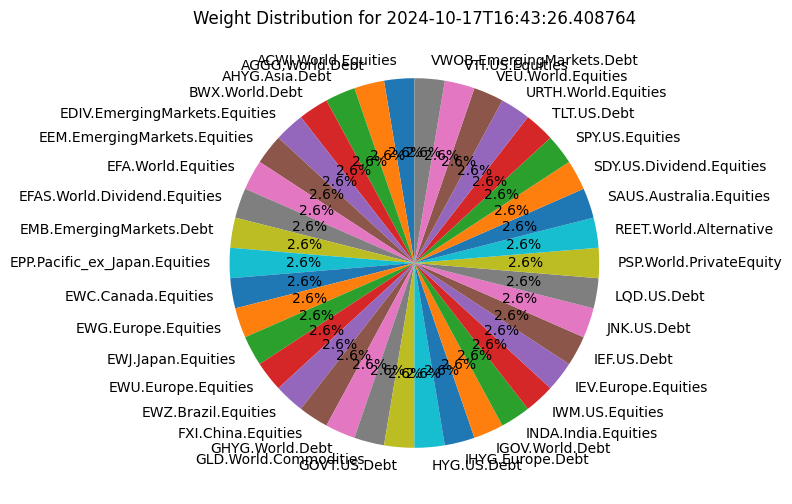

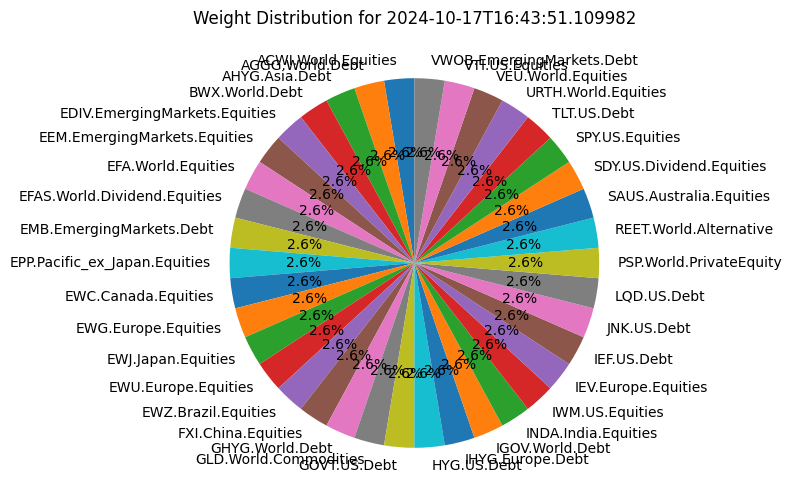

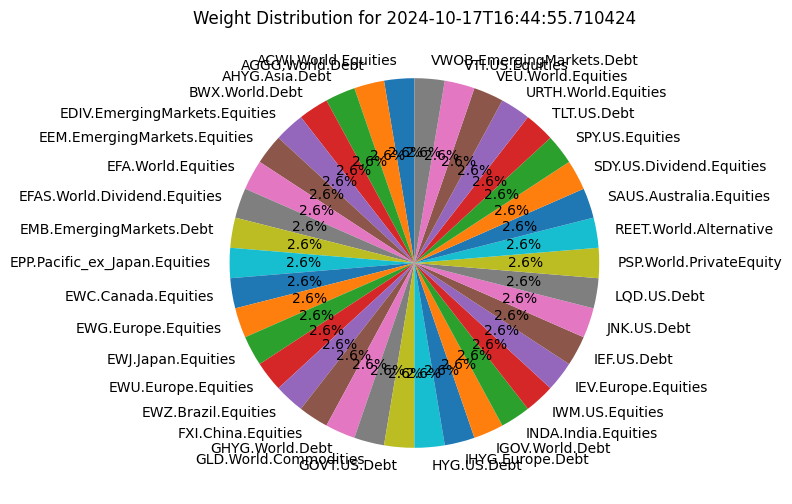

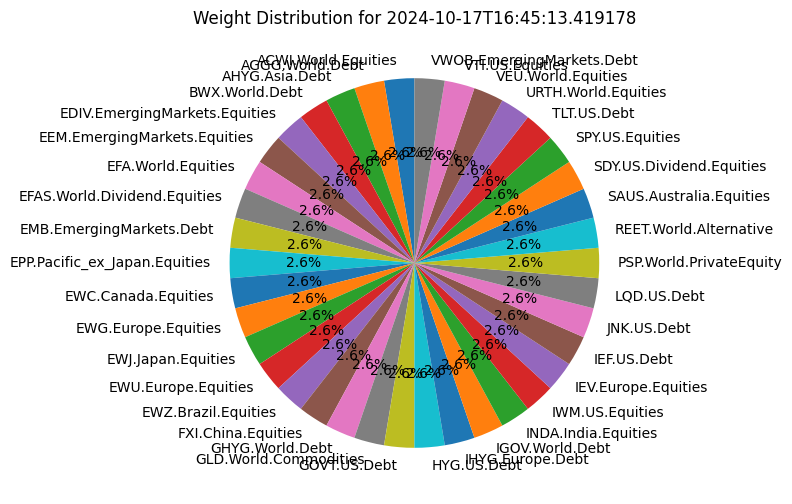

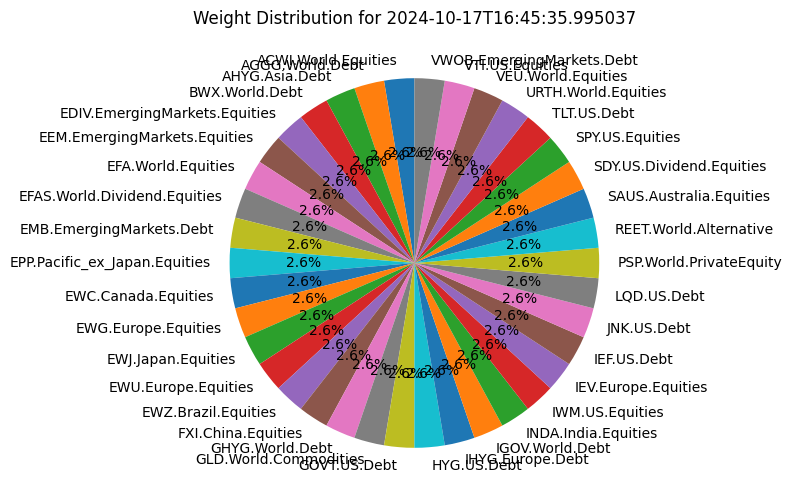

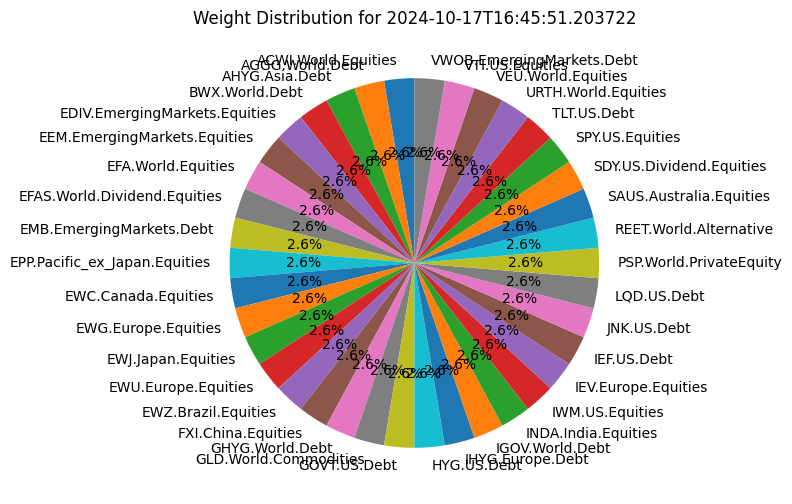

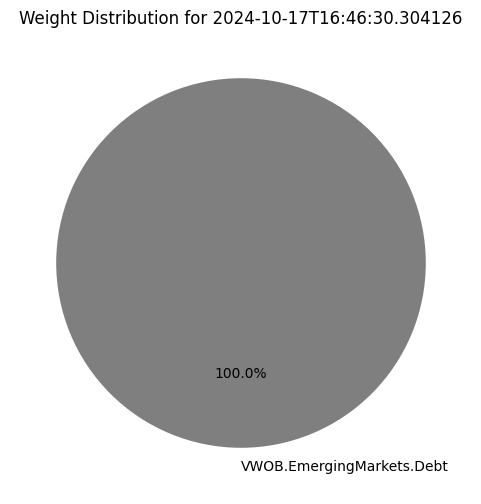

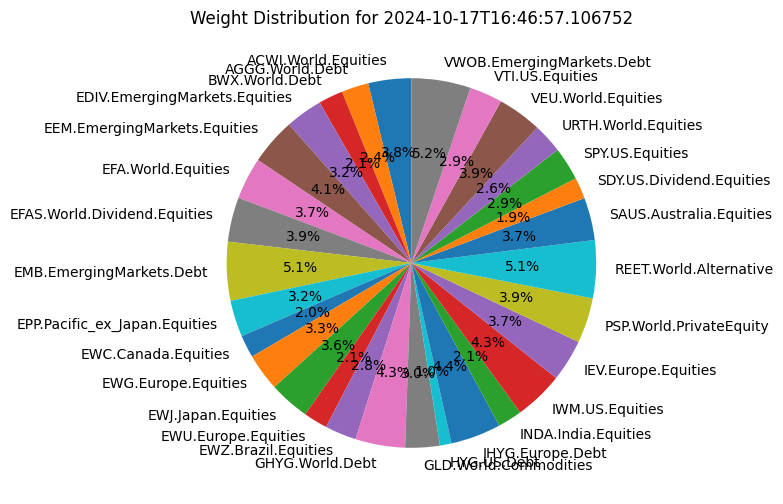

In [40]:
def plot_weight_distribution(results, threshold=0.01):
    
    for timestamp, result in results.items():
        normalized_weights = result['normalized_weights']

        filtered_weights = [weight if weight >=
                            threshold else 0 for weight in normalized_weights]
        filtered_labels = [name if weight >= threshold else '' for name, weight in zip(
            asset_names, normalized_weights)]

        plt.figure(figsize=(6, 6))
        plt.pie(filtered_weights, labels=filtered_labels,
                autopct=lambda p: f'{p:.1f}%' if p > 0 else '', startangle=90)


        plt.title(f'Weight Distribution for {timestamp}')
        plt.show()


plot_weight_distribution(results)